In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/BIKE DETAILS.csv')

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
#1.What is the range of selling prices in the dataset?
a = df['selling_price'].min()
b = df['selling_price'].max()
print(f'The range of selling prices is {a} to {b}')

The range of selling prices is 5000 to 760000


In [ ]:
#2.What is the median selling price for bikes in the dataset?
median_selling_price = df['selling_price'].median()
print(f'The median selling price for bikes in the dataset is {median_selling_price}')

The median selling price for bikes in the dataset is 45000.0


In [ ]:
#3.What is the most common seller type?
most_common_seller_type = df['seller_type'].value_counts()
print(f'The most common seller type is {most_common_seller_type}')

The most common seller type is seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?



#len(df[df['km_driven'] > 50000])

In [ ]:
#5.What is the average km_driven value for each ownership type?



#df.groupby('owner')['km_driven'].mean()



In [ ]:
#6. What proportion of bikes are from the year 2015 or older?
a = len(df[df['year']<=2015])
b  = len(df['year'])
print(f'proportion of bikes are from the year 2015 or older {(a/b)*100}')



proportion of bikes are from the year 2015 or older 56.64467483506126


In [ ]:
#7. What is the trend of missing values across the dataset?
df.isnull().sum()




,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?
df[df['ex_showroom_price']==df['ex_showroom_price'].max()]


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,<bound method Series.unique of 0 <bound ...,1278000.0


In [ ]:
#9.What is the total number of bikes listed by each seller type?
df['seller_type'].value_counts()


,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes?
df[df['owner']=='First Owner'][['selling_price','km_driven']].corr()


,selling_price,km_driven
selling_price,NaN,NaN
km_driven,NaN,NaN


In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method?
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]



<Axes: xlabel='year', ylabel='selling_price'>

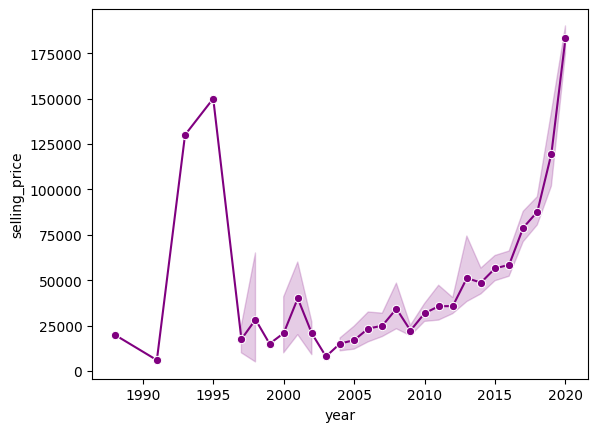

In [ ]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price?


sns.lineplot(x= 'year',y = 'selling_price',data = df,marker = 'o',color = 'purple')


In [ ]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing
#year)?
df['age'] = 2023 - df['year']
df['depreciation'] = df['selling_price'] - df['ex_showroom_price']
average_depreciation = df.groupby('age')['depreciation'].mean()
print(average_depreciation)




age
3     34260.000000
4     -2954.562500
5    -13023.194805
6    -22306.082353
7    -28328.190476
8    -28013.275000
9    -34505.606061
10   -43086.886792
11   -37317.648649
12   -47102.666667
13   -45658.928571
14   -38227.785714
15   -54732.428571
16   -42399.000000
17   -39664.500000
18   -44852.000000
19   -36852.000000
20             NaN
21             NaN
22   -34852.000000
23             NaN
24             NaN
25             NaN
26             NaN
28             NaN
30             NaN
32             NaN
35             NaN
Name: depreciation, dtype: float64


In [ ]:
#14.Which bike names are priced significantly above the average price for their manufacturing year?
average_price = df.groupby('year')['selling_price'].mean()
df = df.merge(average_price, on='year', suffixes=('', '_avg'))
df


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,depreciation,selling_price_avg,selling_price_avg,selling_price_avg
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,<bound method Series.unique of 0 <bound ...,NaN,4,NaN,119689.511628,119689.511628,119689.511628
1,Honda Dio,45000,2017,Individual,1st owner,<bound method Series.unique of 0 <bound ...,NaN,6,NaN,78894.736842,78894.736842,78894.736842
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,<bound method Series.unique of 0 <bound ...,148114.0,5,1886.0,87660.374046,87660.374046,87660.374046
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,<bound method Series.unique of 0 <bound ...,89643.0,8,-24643.0,56500.000000,56500.000000,56500.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,<bound method Series.unique of 0 <bound ...,NaN,12,NaN,35655.721311,35655.721311,35655.721311
...,...,...,...,...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,<bound method Series.unique of 0 <bound ...,52000.0,13,-35000.0,31793.333333,31793.333333,31793.333333
1057,Honda CB twister,16000,2012,Individual,1st owner,<bound method Series.unique of 0 <bound ...,51000.0,11,-35000.0,35748.400000,35748.400000,35748.400000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,<bound method Series.unique of 0 <bound ...,57000.0,10,-42000.0,51136.986301,51136.986301,51136.986301
1059,Honda CB Shine,12000,2009,Individual,1st owner,<bound method Series.unique of 0 <bound ...,58000.0,14,-46000.0,22267.857143,22267.857143,22267.857143


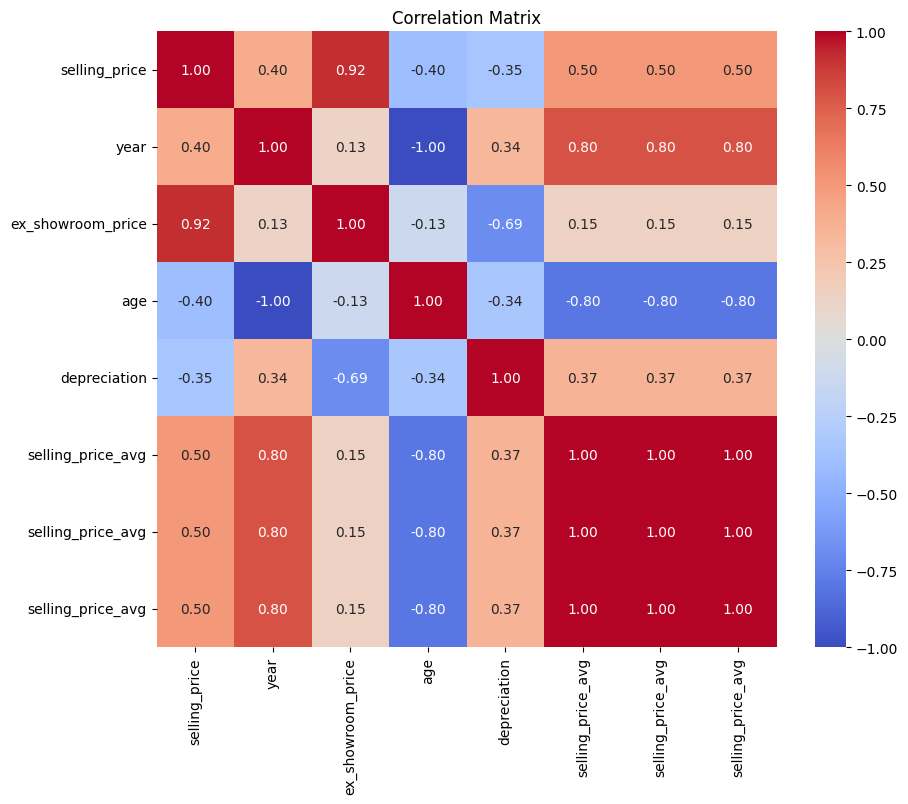

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
corr = df.corr(numeric_only = True)
plt.figure(figsize = (10,8))
sns.heatmap(corr,annot= True,cmap ='coolwarm',fmt  = ".2f" )

plt.title("Correlation Matrix")
plt.show()

EDA - 2

In [ ]:
df = pd.read_csv("/content/Car Sale.csv")

In [ ]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000.0,06457-3834,SUV,8264678.0,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000.0,60504-7114,SUV,6848189.0,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500.0,38701-8047,Passenger,7298798.0,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000.0,99301-3882,SUV,6257557.0,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500.0,53546-9427,Hatchback,7081483.0,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13084,C_CND_013085,4/22/2023,Alice,Female,13500,Saab-Belle Dodge,Honda,Accord,DoubleÂ Overhead Camshaft,Auto,Pale White,19000.0,60504-7114,Sedan,6135153.0,Aurora
13085,C_CND_013086,4/22/2023,Austin,Male,950000,Gartner Buick Hyundai Saab,Toyota,Tacoma,Overhead Camshaft,Manual,Black,36000.0,38701-8047,Hardtop,8955742.0,Greenville
13086,C_CND_013087,4/22/2023,Madina,Male,13500,Scrivener Performance Engineering,Buick,Park Avenue,Overhead Camshaft,Manual,Black,29001.0,38701-8047,Hatchback,7614329.0,Scottsdale
13087,C_CND_013088,4/22/2023,Lauriane,Male,485000,Star Enterprises Inc,Mercedes-B,SLK,Overhead Camshaft,Manual,Pale White,57001.0,99301-3882,Passenger,7997876.0,Austin


In [ ]:
#1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?
df.groupby('Dealer_Name')['Price ($)'].mean()



,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27669.456091
C & M Motors Inc,28393.724138
Capitol KIA,27719.830946
Chrysler Plymouth,27909.411765
Chrysler of Tri-Cities,28820.379822
Classic Chevy,27940.105413
Clay Johnson Auto Sales,27596.997041
Diehl Motor CO Inc,27775.500000
Enterprise Rent A Car,27882.040462


In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
df.groupby('Company')['Price ($)'].std()

,Price ($)
Company,
Acura,8121.293738
Audi,13461.232258
BMW,14719.477655
Buick,17629.673904
Cadillac,19193.624592
Chevrolet,13664.776875
Chrysler,11608.925979
Dodge,11269.806312
Ford,15871.880806


In [ ]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
df.groupby('Transmission')['Price ($)'].quantile([0.25, 0.5, 0.75])




Transmission      
Auto          0.25    19000.0
              0.50    24000.0
              0.75    35000.0
Manual        0.25    17000.0
              0.50    22001.0
              0.75    34000.0
Name: Price ($), dtype: float64

In [ ]:
#4.What is the distribution of car prices across different regions?
df.groupby('Dealer_Region')['Price ($)'].mean()

,Price ($)
Dealer_Region,
Aurora,28164.561313
Austin,28323.760054
Greenville,28048.761821
Janesville,27855.076010
Middletown,28136.979792
Pasco,28255.606722
Scottsdale,27753.626138


In [ ]:
#5.What is the distribution of cars based on body styles?
df['Body Style'].value_counts()

,count
Body Style,
Hatchback,3678
SUV,3299
Sedan,2461
Passenger,2153
Hardtop,1497


In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income?
df.groupby(['Gender','Annual Income'])['Price ($)'].mean()

Gender  Annual Income
Female  13500            27942.16041
        121000           20000.00000
        253000           16000.00000
        255000           43000.00000
        256000           16000.00000
                            ...     
Male    5800000          13000.00000
        6400000          71000.00000
        6500000          25000.00000
        6800000          15000.00000
        7650000          21000.00000
Name: Price ($), Length: 2583, dtype: float64

In [ ]:

#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
df.groupby('Dealer_Region')['Price ($)'].mean()


,Price ($)
Dealer_Region,
Aurora,28164.561313
Austin,28323.760054
Greenville,28048.761821
Janesville,27855.076010
Middletown,28136.979792
Pasco,28255.606722
Scottsdale,27753.626138


In [ ]:
#8.How does the average car price differ between cars with different engine sizes?
df.groupby('Engine')['Price ($)'].mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28265.712139
Overhead Camshaft,27863.964332


In [ ]:
#9.How do car prices vary based on the customer’s annual income bracket?
df.groupby('Annual Income')['Price ($)'].mean()

,Price ($)
Annual Income,
13500,27656.42206
85000,43000.00000
121000,20000.00000
131000,17000.00000
145000,14000.00000
...,...
6400000,71000.00000
6460000,14000.00000
6500000,25000.00000


In [ ]:
#10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?
df.groupby('Model')['Price ($)'].count().sort_values(ascending = False).head(5)

,Price ($)
Model,
Diamante,230
Silhouette,224
Prizm,220
Jetta,218
RL,209


In [ ]:
#11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?
df.groupby(['Engine','Color'])['Price ($)'].std()


Engine                     Color     
DoubleÂ Overhead Camshaft  Black         12536.060854
                           Pale White    14336.133852
                           Red           13689.189835
Overhead Camshaft          Black         17474.037166
                           Pale White    12390.520375
                           Red           17634.443782
Name: Price ($), dtype: float64

In [ ]:
#12.Is there any seasonal trend in car sales based on the date of sale?
df['Date of Sale'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date of Sale'].dt.month
df.groupby('Month')['Price ($)'].mean()

,Price ($)
Month,
1,27463.567089
2,28087.000000
3,27169.949837
4,28270.183848
5,27477.448000
6,28411.900000
7,28478.574286
8,29174.520988
9,28622.519322


In [ ]:
#13.How does the car price distribution change when considering different combinations of body style and
#transmission type?
df.groupby(['Body Style','Transmission'])['Price ($)'].std()

Body Style  Transmission
Hardtop     Auto            13834.994949
            Manual          14551.367452
Hatchback   Auto            13485.481003
            Manual          15992.193020
Passenger   Auto            13872.093339
            Manual          18482.530364
SUV         Auto            13133.844830
            Manual          14696.229626
Sedan       Auto            14232.408163
            Manual          15475.778772
Name: Price ($), dtype: float64

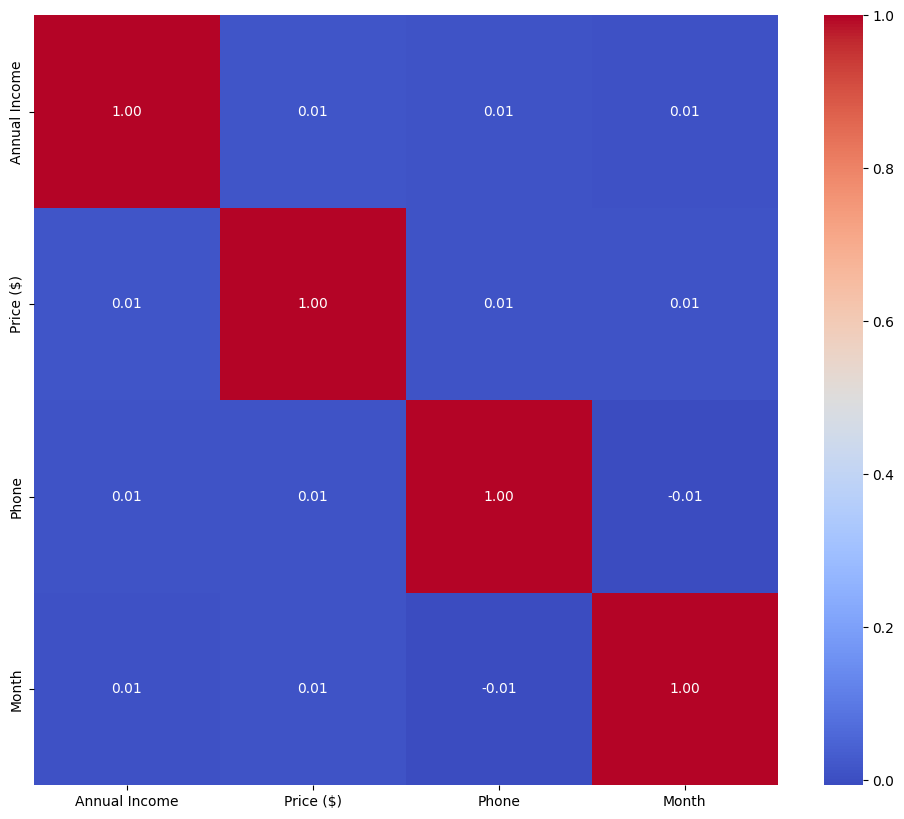

In [ ]:
#14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
corr = df.corr(numeric_only = True)
corr

plt.figure(figsize = (12,10))
sns.heatmap(corr,annot= True,cmap ='coolwarm',fmt  = ".2f" )
plt.show()




In [ ]:
#15.How does the average car price vary across different car models and engine types?
df.groupby(['Model','Engine'])['Price ($)'].mean()


Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    35991.135417
3000GT    DoubleÂ Overhead Camshaft    22563.741176
          Overhead Camshaft            21791.546667
300M      DoubleÂ Overhead Camshaft    21439.616541
323i      DoubleÂ Overhead Camshaft    16780.746032
                                           ...     
Windstar  Overhead Camshaft            17131.000000
Wrangler  DoubleÂ Overhead Camshaft    21841.654545
          Overhead Camshaft            18584.368421
Xterra    DoubleÂ Overhead Camshaft    15474.133333
          Overhead Camshaft            31066.916667
Name: Price ($), Length: 261, dtype: float64

In [ ]:
df = pd.read_csv('/content/amazon.csv')

In [ ]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [ ]:
df['rating'] = df['rating'].str.replace("|","")
df['rating'] = df['rating'].str.replace("","4")

df['rating'] = df['rating'].astype(float)

df['rating'].unique()

In [ ]:
#1.What is the average rating for each product category?
df.groupby('category')['rating'].mean()



,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,4.443444e+06
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.444444e+06
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,4.443444e+06
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,4.443444e+06
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.444444e+06
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.444444e+06
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.444444e+06
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.444444e+06


In [ ]:
df['rating_count'].value_counts()
df['rating_count'] = df['rating_count'].str.replace(",","")
df['rating_count'] = df['rating_count'].str.replace("nan","")
df['rating_count'] = df['rating_count'].astype(float)
df['rating_count'].dtypes


dtype('float64')

In [ ]:
#2.What are the top rating_count products by category?
df.groupby('category')['rating_count'].max().sort_values(ascending = False).head(5)


,rating_count
category,
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",426973.0
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",363713.0
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,313836.0
Home&Kitchen|Kitchen&Dining|KitchenTools|ManualChoppers&Chippers|Choppers,270563.0
Computers&Accessories|ExternalDevices&DataStorage|PenDrives,253105.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
df.discounted_price.unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [ ]:
df.discounted_price.unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [ ]:
df['discounted_price'] = df['discounted_price'].str.replace("₹","")
df['discounted_price'] = df['discounted_price'].str.replace(",","")
df['discounted_price'] = df['discounted_price'].astype(float)
df['discounted_price'].dtypes

dtype('float64')

In [ ]:
df['discounted_price'].dtypes

dtype('float64')

In [ ]:
df['actual_price'].unique()

array([1.09900e+03, 3.49000e+02, 1.89900e+03, 6.99000e+02, 3.99000e+02,
       1.00000e+03, 4.99000e+02, 2.99000e+02, 9.99000e+02, 3.39000e+02,
       7.99000e+02, 7.00000e+02, 8.99000e+02, 2.49990e+04, 2.19900e+04,
       1.79900e+03, 2.29000e+04, 1.99000e+02, 1.99900e+04, 1.99990e+04,
       1.99900e+03, 7.50000e+02, 5.99000e+02, 6.66660e+02, 1.90000e+03,
       4.59990e+04, 6.95000e+02, 3.49990e+04, 1.59900e+03, 1.20800e+03,
       4.75000e+02, 3.95000e+02, 2.19900e+03, 5.00000e+02, 2.10000e+03,
       1.29990e+04, 1.39900e+03, 2.19990e+04, 1.49900e+03, 4.79000e+04,
       8.45000e+02, 1.40000e+03, 1.49900e+04, 2.99900e+03, 4.29990e+04,
       3.09900e+04, 3.99900e+03, 2.49000e+02, 1.91250e+04, 1.29900e+03,
       3.99990e+04, 4.09900e+04, 5.29000e+04, 8.00000e+02, 3.19990e+04,
       1.80900e+03, 2.99990e+04, 6.50000e+04, 2.00000e+04, 2.39900e+04,
       1.59990e+04, 4.49900e+04, 4.49990e+04, 1.70000e+03, 5.95000e+02,
       2.79900e+04, 1.20000e+03, 3.49900e+04, 1.50000e+03, 4.999

In [ ]:
df['actual_price'].dtypes


dtype('float64')

In [ ]:
df['actual_price'] = df['actual_price'].str.replace("₹","")
df['actual_price'] = df['actual_price'].str.replace(",","")
df['actual_price'] = df['actual_price'].astype(float)
df['actual_price'].dtypes



dtype('float64')

In [ ]:
#3. What is the distribution of discounted prices vs. actual prices?

df.groupby('discounted_price')['actual_price'].mean()

,actual_price
discounted_price,
39,125.666667
50,50.000000
57,199.000000
59,171.000000
67,75.000000
...,...
46999,69999.000000
47990,75445.000000
54990,85000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
df.discount_percentage.unique()

array(['64%', '43%', '90%', '53%', '61%', '85%', '65%', '23%', '50%',
       '33%', '55%', '63%', '69%', '60%', '13%', '44%', '38%', '39%',
       '46%', '41%', '70%', '42%', '72%', '25%', '51%', '73%', '0%',
       '80%', '28%', '67%', '58%', '35%', '45%', '62%', '54%', '27%',
       '77%', '56%', '78%', '31%', '86%', '47%', '37%', '75%', '32%',
       '68%', '66%', '22%', '57%', '17%', '52%', '88%', '20%', '59%',
       '40%', '26%', '29%', '83%', '71%', '15%', '76%', '48%', '82%',
       '36%', '89%', '87%', '24%', '34%', '11%', '91%', '7%', '19%',
       '79%', '21%', '81%', '18%', '49%', '30%', '84%', '10%', '6%',
       '14%', '74%', '4%', '5%', '16%', '8%', '2%', '94%', '12%', '3%',
       '9%'], dtype=object)

In [ ]:
df['discount_percentage'] = df['discount_percentage'].str.replace("%","")
df['discount_percentage'] = df['discount_percentage'].astype(float)
df['discount_percentage'].dtypes

dtype('float64')

In [ ]:
#4. How does the average discount percentage vary across categories?
df.groupby('category')['discount_percentage'].mean()

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,46.5
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",0.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",5.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",17.5


In [ ]:
#5.What are the most popular product names?
df['product_name'].value_counts().head(5)


,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
Flix Micro Usb Cable For Smartphone (Black),3


In [ ]:
#6.What are the most popular product keywords?
df['product_id'].value_counts().head(5)

,count
product_id,
B083342NKJ,3
B077Z65HSD,3
B09W5XR9RT,3
B09KLVMZ3B,3
B09NHVCHS9,3


In [ ]:
#7. What are the most popular product reviews?
df['review_id'].value_counts().head(5)

,count
review_id,
"R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,RDVX50PD4CTFE,R3H6WKG0TA5CGU,R3Q3L1KP5QWPV3,RU0LU2PAIIME,R20FTANBPFA653",10
"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I",8
"R2K5OD0MEEBTDL,RS1N6TNO33BOK,R6KWBGOKI1N9Y,R30SKUMYLSXXDN,R1EOYHZWCRSV7B,R13JBDK4SAAYFT,RJOU5K9ECNW7Y,R2APPRANV6IERZ",8
"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3KY,R17KQRUTAN5DKS,R3AAQGS6HP2QUK,R1HDNOG6TO2CCA,R3PHKXYA5AFEOU",7
"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1CLH2ULIVG5U3,R2DMKIBGFKBD6R,RC89B5IAJUTR5,R3B3DDON5FH8DS,R13WAEJDI5RS36",7


In [ ]:
#8. What is the correlation between discounted_price and rating?
df[['discounted_price','rating']].corr()


,discounted_price,rating
discounted_price,1.000000,0.004301
rating,0.004301,1.000000


In [ ]:
#9. What are the Top 5 categories based on the highest ratings?
df.groupby('category')['rating'].mean().sort_values(ascending = False).head(5)

,rating
category,
Computers&Accessories|Tablets,4.444444e+06
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.444444e+06
Electronics|Cameras&Photography|Accessories|Film,4.444444e+06
Computers&Accessories|Components|Memory,4.444444e+06
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.444444e+06


In [ ]:
#10. Identify any potential areas for improvement or optimization based on the data analysis?
#Data cleaing
df.isnull().sum()

df.fillna("0",inplace = True)

df.isnull().sum()


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


<Axes: xlabel='discounted_price', ylabel='rating'>

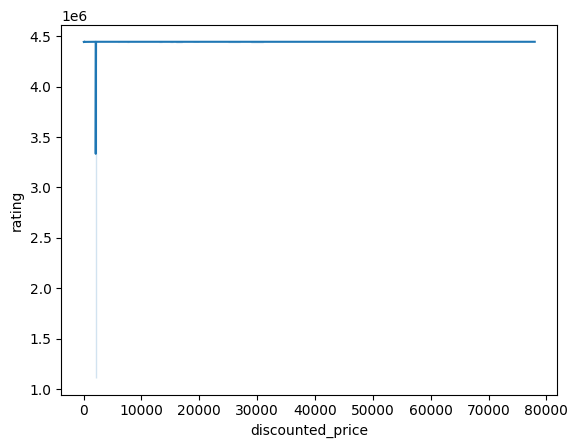

In [ ]:
#creating scatterplot
sns.lineplot(x = 'discounted_price',y = 'rating',data = df)

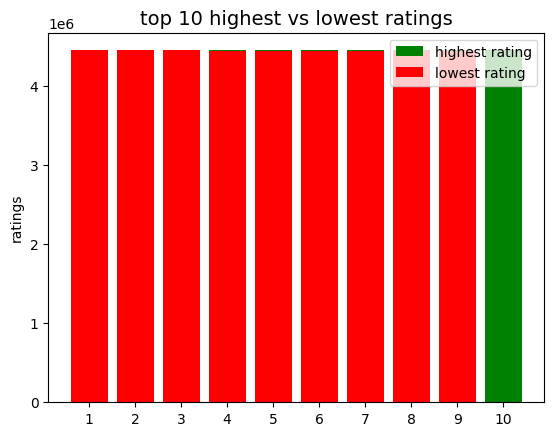

In [ ]:
c = [1,2,3,4,5,6,7,8,9,10]
y1 = df.rating.sort_values(ascending = False).head(10)
y2 = df.rating.sort_values(ascending = False).tail(10)


plt.bar(c,y1,color = 'g',label = 'highest rating')
plt.bar(c,y2,color = 'r',label = 'lowest rating')

plt.title("top 10 highest vs lowest ratings",fontsize = 14)
plt.xticks(c)
plt.ylabel('ratings')
plt.legend()
plt.show()

In [31]:
df = pd.read_csv('/content/spotify.csv')

In [32]:

df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [33]:
df.dtypes

,0
Artist,object
Track Name,object
Popularity,int64
Duration (ms),int64
Track ID,object


In [34]:
#Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful\

df.isnull().sum()



,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [35]:
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
435,True
436,False
437,False
438,False


In [36]:
#df = df.drop_duplicates(inplace = True)

,Popularity
Track ID,
00p23Uw776hxaIGNWL9S1Y,69.0
01CHrTerCzyRpMI1MzQ4fz,54.0
01qFKNWq73UfEslI0GvumE,84.0
02xkg0KUfiytfbnwAevy1p,73.0
04CyMEHliadfQWMUJb1w99,89.0
...,...
7sO5G9EABYOXQKNPNiE9NR,86.0
7xQAfvXzm3AkraOtGPWIZg,84.0
7xVLFuuYdAvcTfcP3IG3dS,69.0


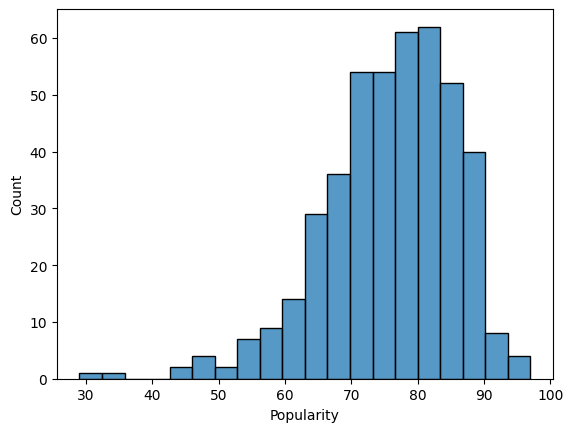

In [38]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
sns.histplot(df['Popularity'])
df.groupby('Track ID')['Popularity'].mean()

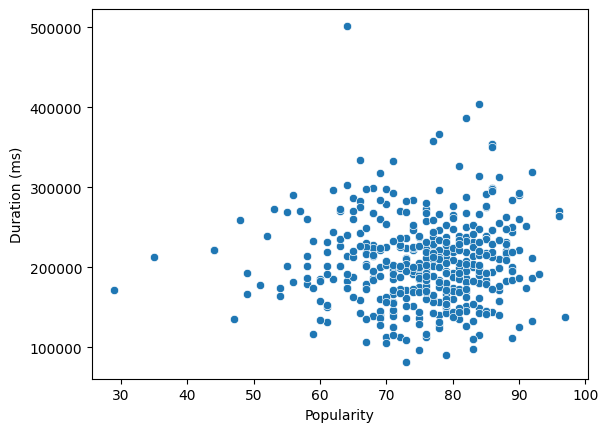

In [42]:
#3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
sns.scatterplot(x = 'Popularity',y = 'Duration (ms)',data = df)
plt.show()



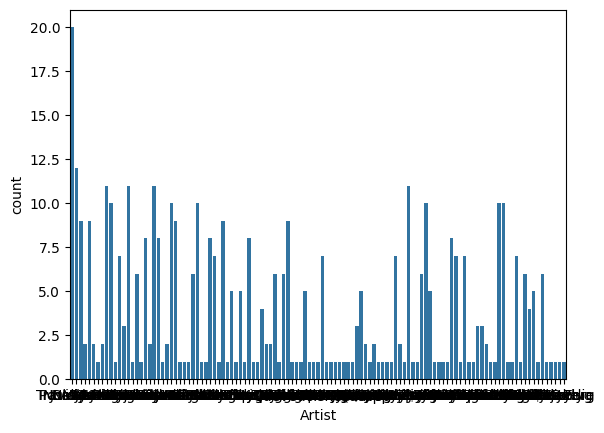

In [47]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?
df['Artist'].value_counts()
sns.countplot(x = 'Artist',data = df)
plt.show()



In [48]:
#5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
df.groupby(['Artist','Track Name'])['Popularity'].mean().sort_values(ascending = True).head(5)


,,Popularity
Artist,Track Name,
Pressa,Attachments (feat. Coi Leray),29.0
Justin Bieber,Intentions,35.0
French Montana,Splash Brothers,44.0
Lil Baby,On Me - Remix,47.0
Wyclef Jean,911 (feat. Mary J. Blige),48.0


In [49]:
#6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?
df.groupby('Artist')['Popularity'].mean().sort_values(ascending = False).head(5)



,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,87.000000
¥$,86.090909


In [50]:
#7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
df.groupby(['Artist','Track Name'])['Popularity'].mean().sort_values(ascending = False).head(5)


,,Popularity
Artist,Track Name,
Jack Harlow,Lovin On Me,97.0
21 Savage,redrum,96.0
¥$,CARNIVAL,96.0
Travis Scott,FE!N (feat. Playboi Carti),93.0
Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92.0


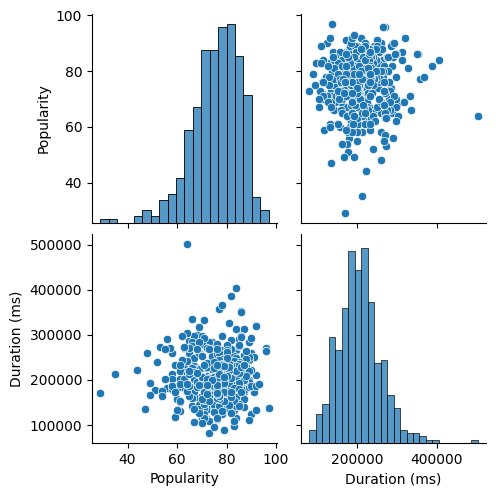

In [59]:
#8.isualize relationships between multiple numerical variables simultaneously using a pair plot


sns.pairplot(df[['Popularity','Duration (ms)']])
plt.show()



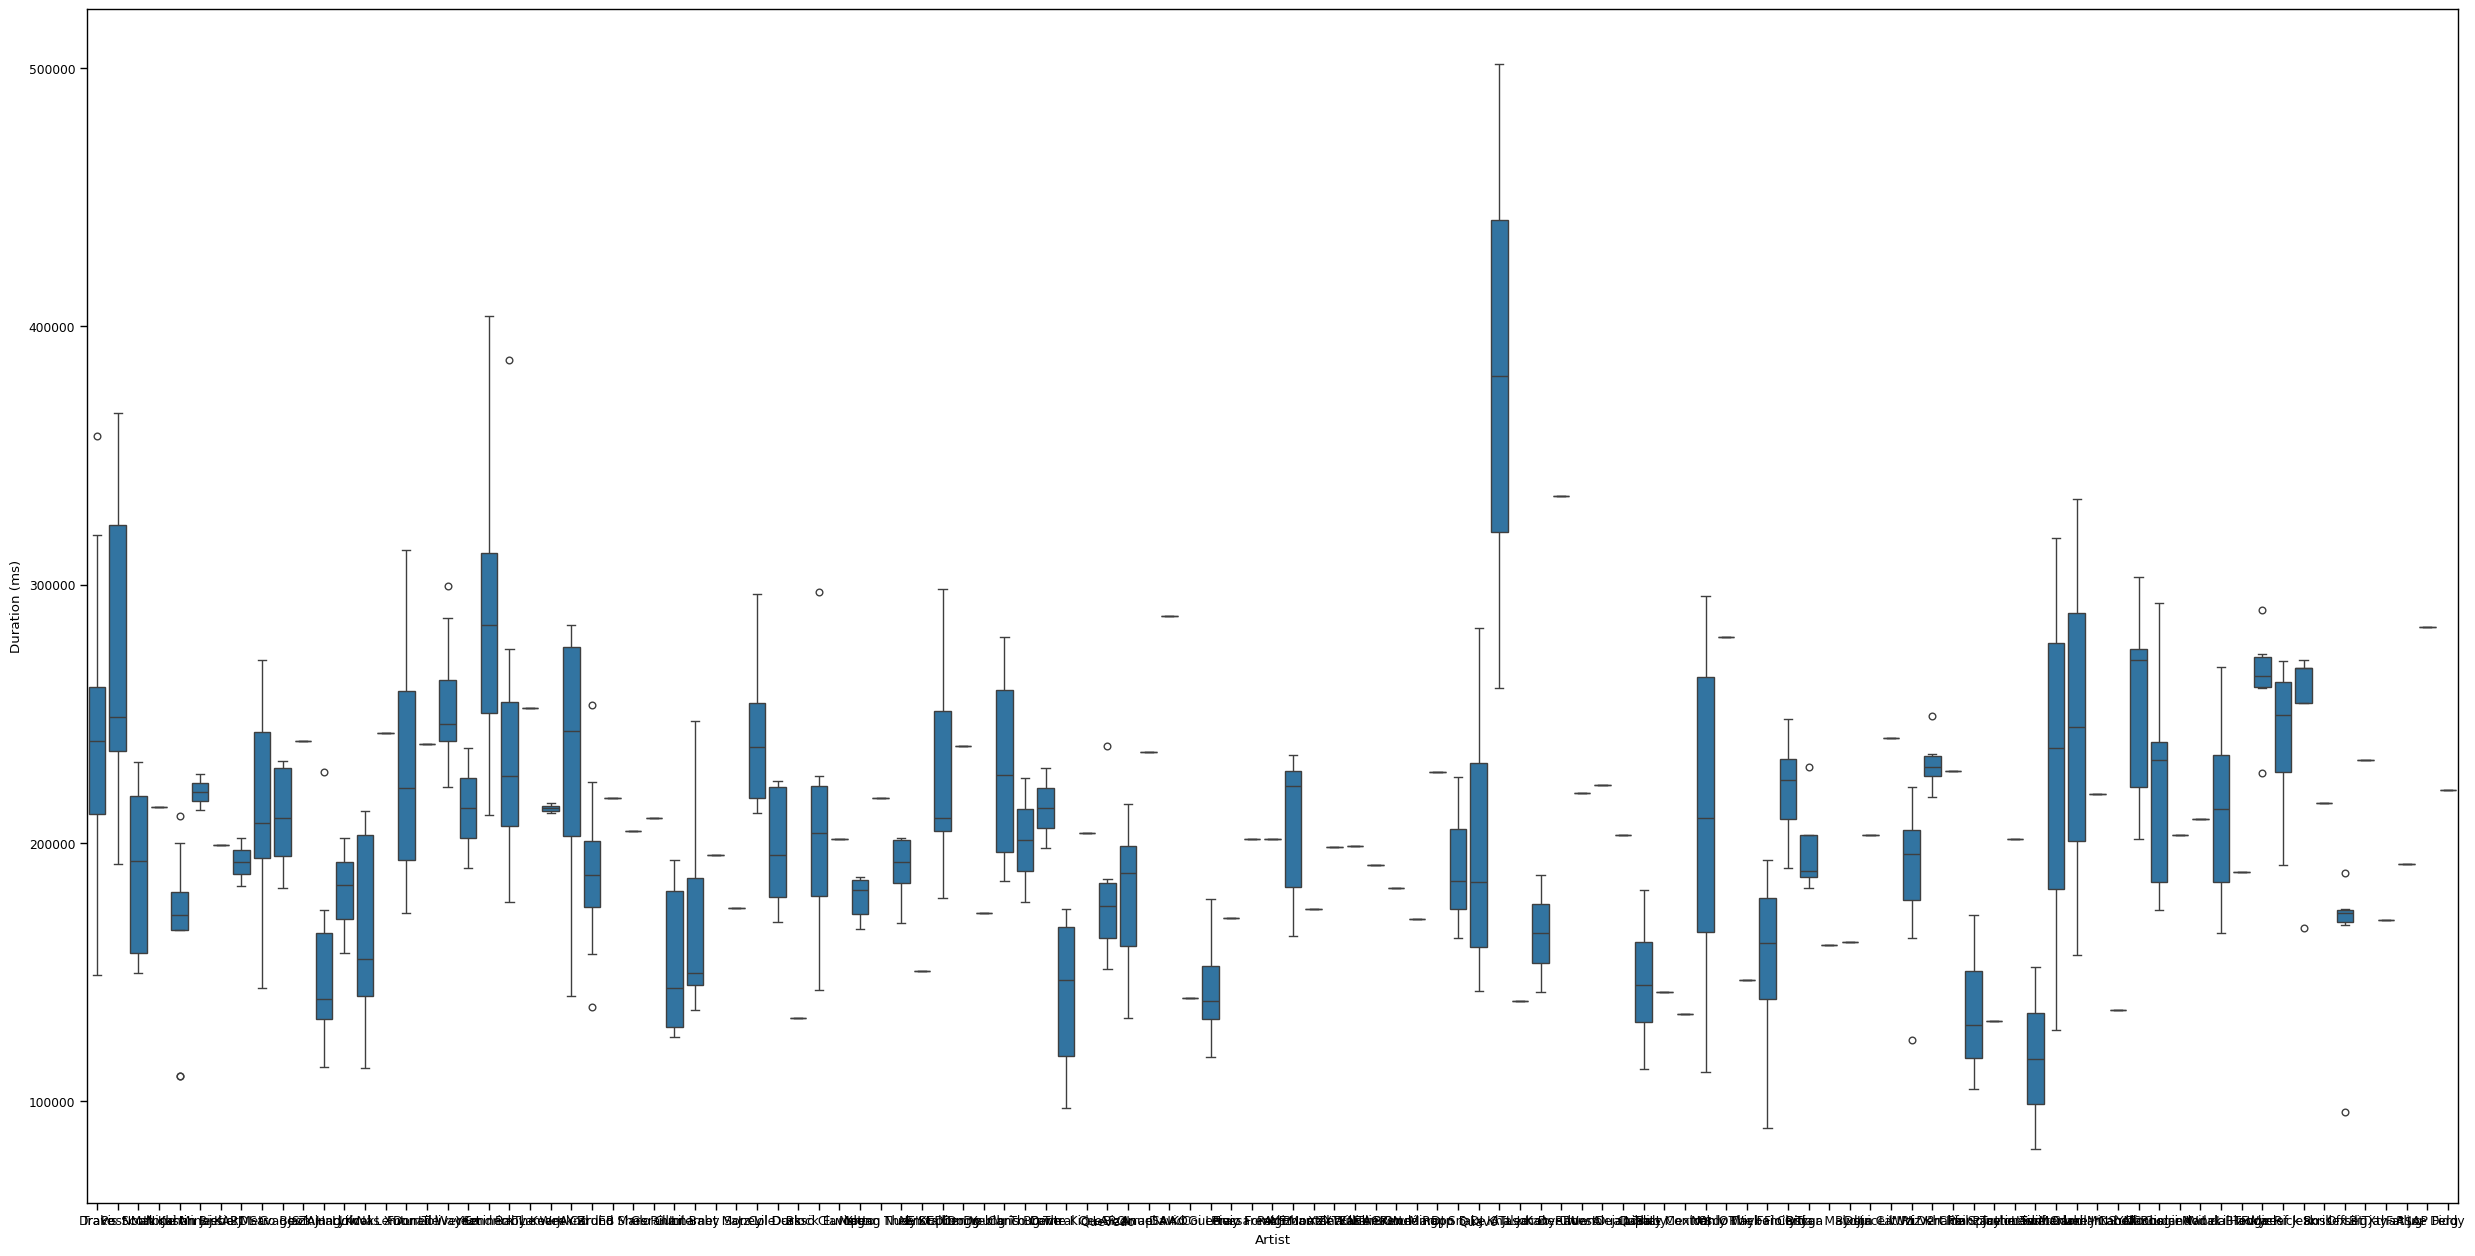

In [82]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

fig,ax = plt.subplots()
fig.set_size_inches(30.6,15.5)
sns.set_context("paper",rc = {"font.size":12,"axes.titlesize":12,"axes.label":12})
sns.boxplot(x = 'Artist',y = 'Duration (ms)',data = df)
plt.show()



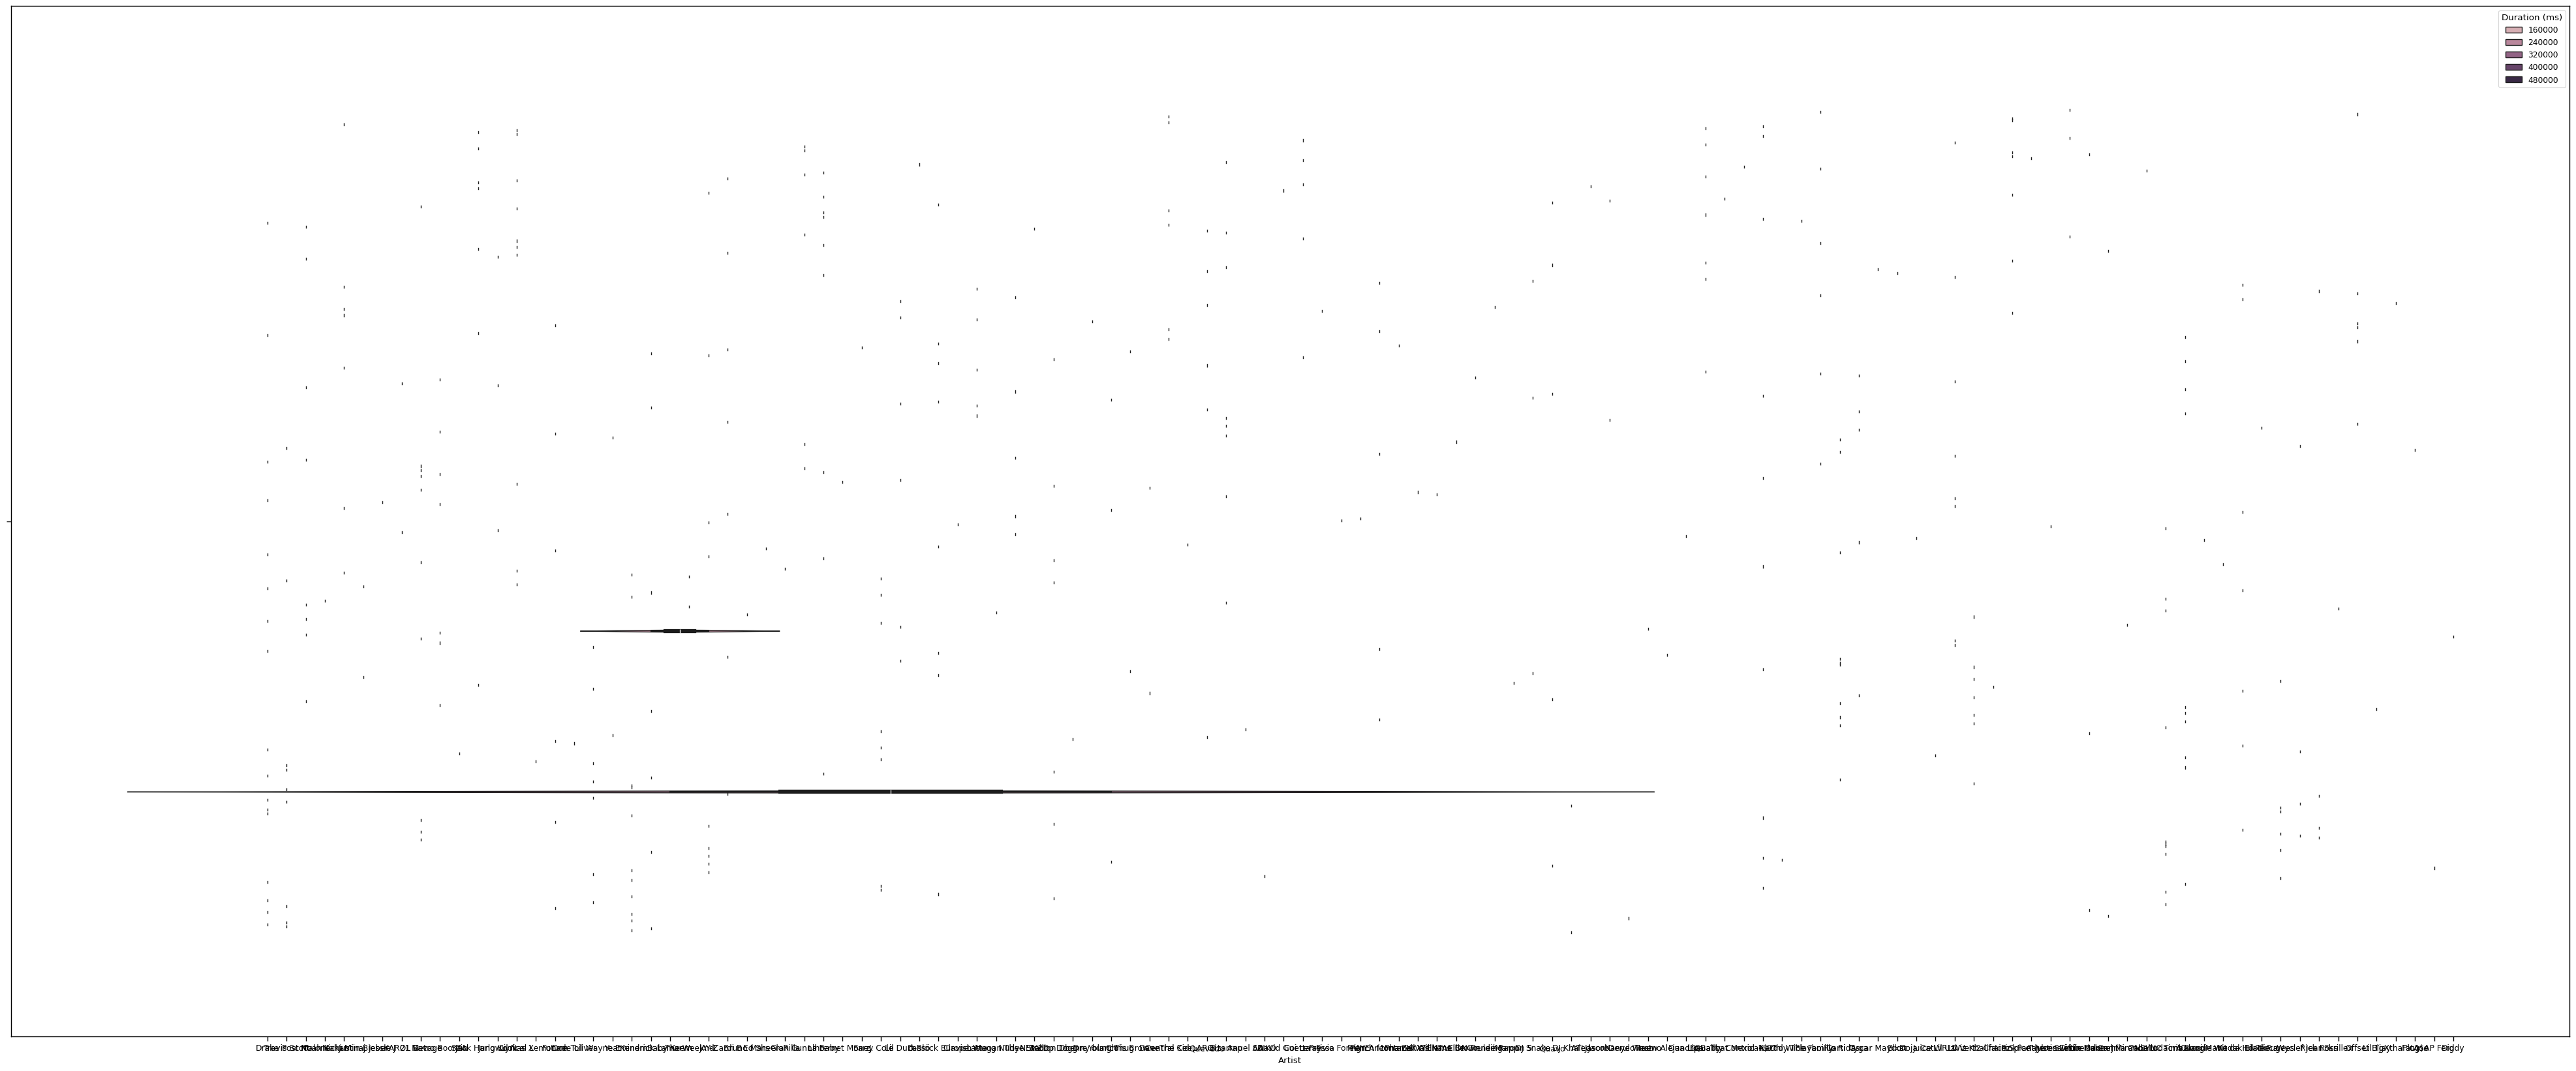

In [79]:
fig,ax = plt.subplots()
fig.set_size_inches(50.6,20.5)
sns.set_context("paper",rc = {"font.size":12,"axes.titlesize":12,"axes.label":12})

sns.violinplot(x = 'Artist',hue= 'Duration (ms)',data = df)
plt.show()

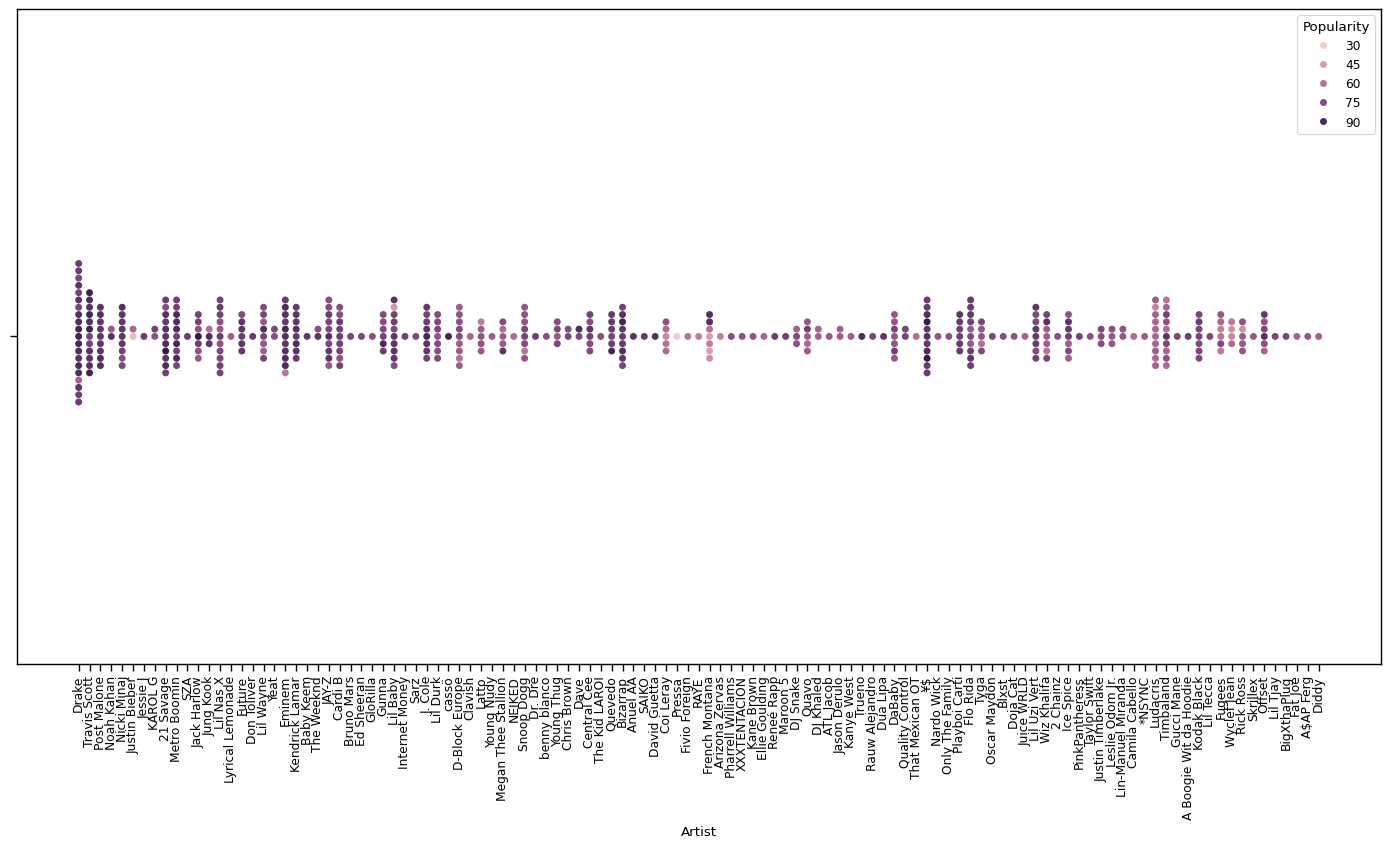

In [75]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
fig,ax = plt.subplots()
fig.set_size_inches(17.6,8.5)
sns.set_context("paper",rc = {"font.size":12,"axes.titlesize":12,"axes.label":12})
sns.swarmplot(x = 'Artist',hue = 'Popularity',data = df )

plt.xticks(rotation = 90)

#sns.violinplot(x = 'Artist',y = 'Popularity',data = df)
plt.show()
